In [1]:
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.set_option('max_rows', 5)
%matplotlib inline

# 母比率の検定

## z検定
---
標本分布が二項分布の場合、**期待値 $np$ (および分散 $np(1-p)$) が大きいとき**には[正規分布 $\mathcal{N}(np,np(1-p))$ で近似できる](../beginner/distribution.ipynb#%E7%A2%BA%E7%8E%87%E5%88%86%E5%B8%83%E3%81%BE%E3%81%A8%E3%82%81)ことを利用して検定する。  
検定統計量

$$
\begin{align}
    z & =\frac
        {n\overline{X} -np}
        {\sqrt{
            np( 1-p)
        }}\\
     & \\
     & =\frac
         {\overline{X} -p}
         {\sqrt{
             {\displaystyle \frac
                 {p( 1-p)}
                 {n}
             }
         }}
\end{align}
$$

は標準正規分布 $\mathcal{N}(0,1)$ に従う。

練習問題

---
コイントスを 30 回行い、 20 回表が出たとする。コインに偏りがある $\displaystyle \left( p\neq \frac{1}{2}\right)$ かどうかを検定するための統計量 $z$ を求める。

In [2]:
np.random.seed(1234)
x = [0] * 10 + [1] * 20
np.random.shuffle(x)
coin = pd.DataFrame(dict(X=x))
print('coin')
display(coin)

coin


X
0   0
1   1
.. ..
28  1
29  1

[30 rows x 1 columns]

解答例

---

In [3]:
p = 0.5
z = (coin['X'].mean() - p) / np.sqrt(p * (1 - p) / coin.index.size)
z

1.8257418583505534

---

練習問題

---
この検定に対応する帰無分布 (検定統計量 $z$ が従う分布) の確率密度関数と、上で求めた $z$ 統計量の位置をグラフ表示する。

解答例

---

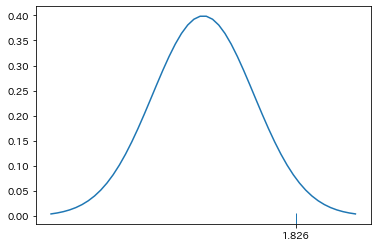

In [4]:
x = np.linspace(-3, 3, 50)
null_dist = stats.norm()
plt.plot(x, null_dist.pdf(x))
sns.rugplot([z])
plt.xticks([z])
plt.show()

---

練習問題

---
上で求めた検定統計量 $z$ に対応した $p$ 値を求める。

解答例

---

In [5]:
p_value = null_dist.sf(np.abs(z)) * 2
p_value

0.06788915486182906

---

## Pythonでのz検定実行方法
---
`statsmodels.stats.proportion.proportions_ztest`を使用する。`prop_var` (分散を算出する基礎となる割合) には帰無仮説で設定した値を与える。

In [6]:
help(proportions_ztest)

Help on function proportions_ztest in module statsmodels.stats.proportion:

proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)
    Test for proportions based on normal (z) test
    
    Parameters
    ----------
    count : {int, array_like}
        the number of successes in nobs trials. If this is array_like, then
        the assumption is that this represents the number of successes for
        each independent sample
    nobs : {int, array_like}
        the number of trials or observations, with the same length as
        count.
    value : float, array_like or None, optional
        This is the value of the null hypothesis equal to the proportion in the
        case of a one sample test. In the case of a two-sample test, the
        null hypothesis is that prop[0] - prop[1] = value, where prop is the
        proportion in the two samples. If not provided value = 0 and the null
        is prop[0] = prop[1]
    alternative : str in ['two-sided', 'sma

In [7]:
proportions_ztest(coin['X'].sum(), coin.index.size, p, prop_var=p)

(1.8257418583505534, 0.06788915486182906)

## 推薦図書
---
- [統計学入門 (基礎統計学Ⅰ)](https://www.amazon.co.jp/%E7%B5%B1%E8%A8%88%E5%AD%A6%E5%85%A5%E9%96%80-%E5%9F%BA%E7%A4%8E%E7%B5%B1%E8%A8%88%E5%AD%A6%E2%85%A0-%E6%9D%B1%E4%BA%AC%E5%A4%A7%E5%AD%A6%E6%95%99%E9%A4%8A%E5%AD%A6%E9%83%A8%E7%B5%B1%E8%A8%88%E5%AD%A6%E6%95%99%E5%AE%A4/dp/4130420658/)
- [日本統計学会公式認定 統計検定2級対応 統計学基礎](https://www.amazon.co.jp/%E6%94%B9%E8%A8%82%E7%89%88-%E6%97%A5%E6%9C%AC%E7%B5%B1%E8%A8%88%E5%AD%A6%E4%BC%9A%E5%85%AC%E5%BC%8F%E8%AA%8D%E5%AE%9A-%E7%B5%B1%E8%A8%88%E6%A4%9C%E5%AE%9A2%E7%B4%9A%E5%AF%BE%E5%BF%9C-%E7%B5%B1%E8%A8%88%E5%AD%A6%E5%9F%BA%E7%A4%8E-%E7%94%B0%E4%B8%AD%E8%B1%8A/dp/4489022271/)